In [1]:
from random import random

In [2]:
# fineApple
# Apple
# class  - 2개
# 분류
# 이진 분류(binary classification)
pineApple_length = [random()*25+25 for i in range(50)]
pineApple_weight = [random()*250+250 for i in range(50)]

In [3]:
pineApple_length.sort()
pineApple_weight.sort()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

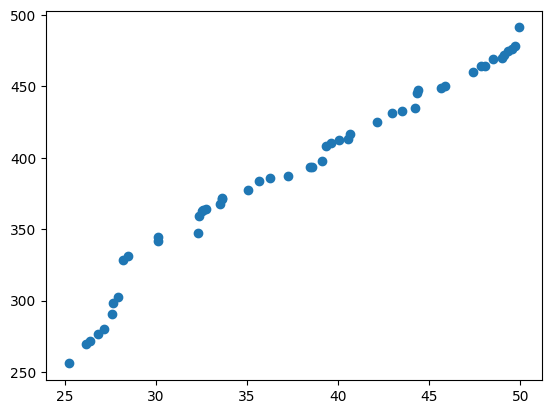

In [5]:
plt.scatter(pineApple_length,pineApple_weight)
plt.show()

In [6]:
apple_length = [random()*5+5 for i in range(30)]
apple_weight = [random()*10+10 for i in range(30)]
apple_length.sort()
apple_weight.sort()

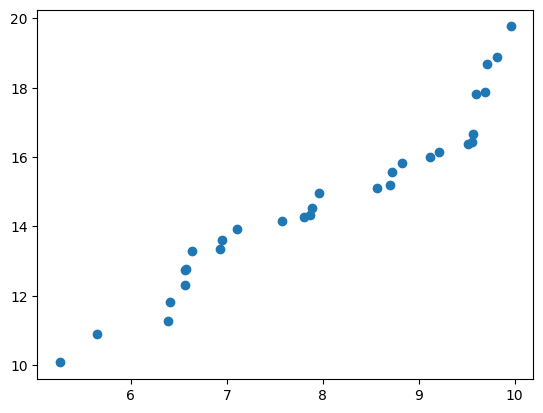

In [7]:
plt.scatter(apple_length,apple_weight)
plt.show()

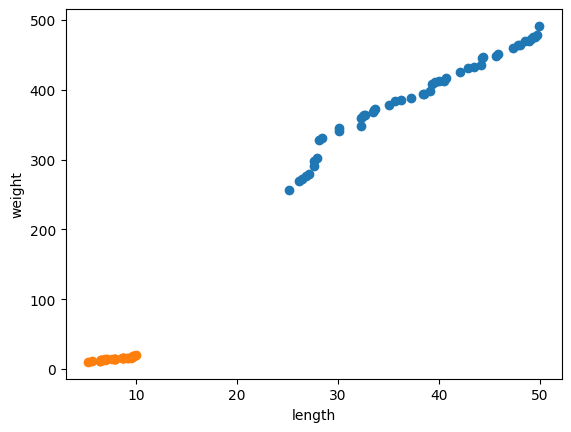

In [8]:
plt.scatter(pineApple_length,pineApple_weight)
plt.scatter(apple_length,apple_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
# 데이터 합치기
length = pineApple_length + apple_length
weight = pineApple_weight + apple_weight

In [10]:
len(length), len(weight)

(80, 80)

In [11]:
data = [[leng,wei] for leng,wei in zip(length,weight)]

In [12]:
# pileApple 0, apple 1
data_target = [0]*50 + [1]*30

In [13]:
# k-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# 사이킷런 계열은 표준화가 되어 있다. - 머신러닝모델선택 - 학습(fit) - 평가(score)/예측(predict)
#                                   -  비머신러닝모델 - 적용(fit)
kn = KNeighborsClassifier()
kn.fit(data,data_target)
kn.score(data,data_target)  # accuracy  0 ~ 1 값을 가지고 *100 

1.0

In [15]:
# 새로운 데이터로 예측을 해봅시다'
new_data = [[30,300]]
kn.predict(new_data)

array([0])

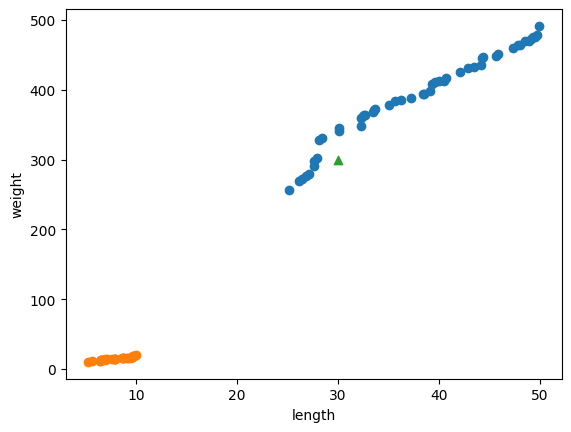

In [16]:
plt.scatter(pineApple_length,pineApple_weight)
plt.scatter(apple_length,apple_weight)
plt.scatter(30,300,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
kn2 =  KNeighborsClassifier(n_neighbors=80)
kn2.fit(data,data_target)
kn2.score(data,data_target)

0.625

In [18]:
50/80

0.625

In [19]:
#하이퍼 파라메터
kn2 =  KNeighborsClassifier()
kn2.fit(data,data_target)
for i in range(5, 100):
    kn2.n_neighbors = i
    score = kn2.score(data,data_target)
    if score<1:
        print(i, score)
        break

60 0.625


In [20]:
# 100% 정확도가 맞는지?
# 학습데이터를 전부 사용하지 않고 일부는 학습 일부는 학습에 참여하지 않은 데이터로 검증

In [21]:
# 나눈다고 나눈게. 나누도 보니.. 전부 label 이 0인 데이터
train_data = data[:50]
train_target =data_target[:50] 
test_data = data[50:]
test_target = data_target[50:]

In [22]:
kn = KNeighborsClassifier()
kn.fit(train_data,train_target)

KNeighborsClassifier()

In [23]:
kn.score(test_data,test_target)

0.0

In [24]:
# 하나도 못맞춘다. - 이유는?

In [25]:
#셈플링 편향
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(data,data_target,random_state=32)


In [27]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)

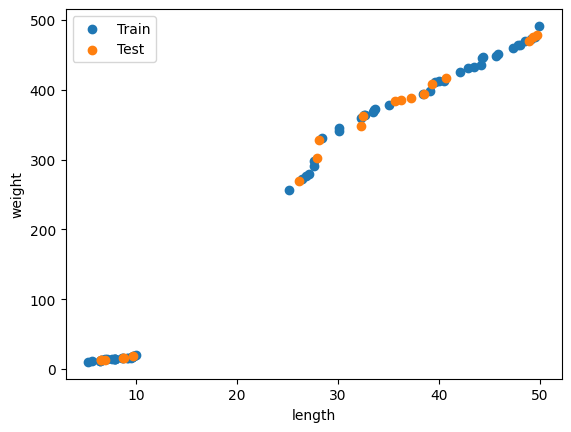

In [28]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.scatter(x_test[:,0],x_test[:,1])
plt.legend(['Train','Test'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
# 데이터를 잘 섞었고. 학습한다.
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
# 섞지 않을때와 비교했을때 섞으니. 100%
# 그럼 이 모델을 일반화 시킬수 있을까?
kn.score(x_test,y_test)

1.0

In [31]:
# 25, 200

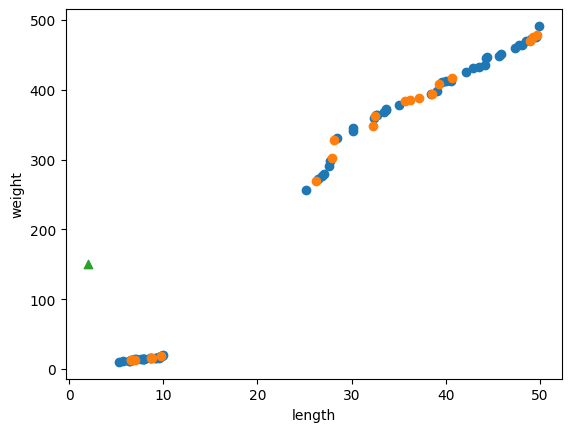

In [32]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.scatter(x_test[:,0],x_test[:,1])
plt.scatter(2,150,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
kn.predict([[2,150]])

array([0])

In [34]:
# 우리가 만든 모델이 어떻게 해서 그룹 0으로 판단했는지 그 근거를 보자
distance,index =  kn.kneighbors([[2,150]])

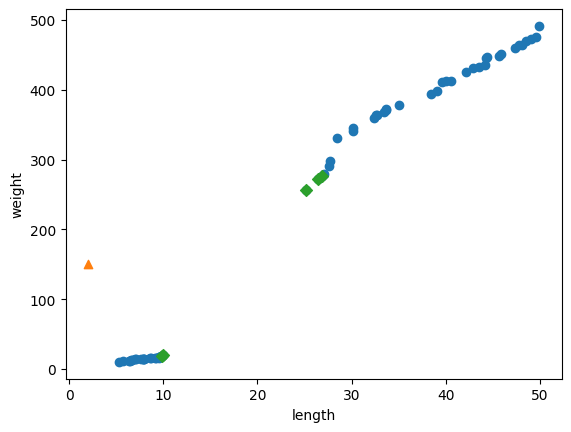

In [35]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.scatter(2,150,marker="^")
plt.scatter(x_train[index,0], x_train[index,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

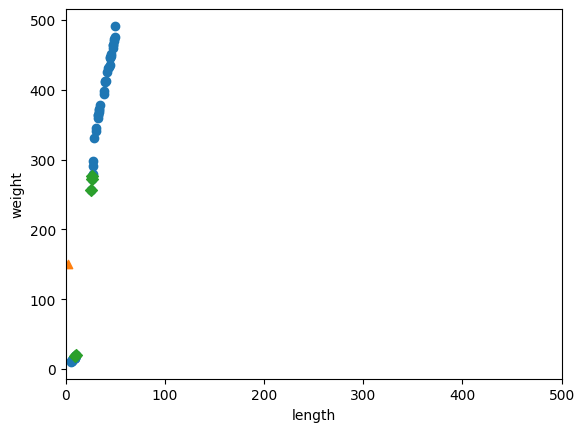

In [36]:
# label 0 1의 데이터 크기가 다르다.
plt.scatter(x_train[:,0],x_train[:,1])
plt.scatter(2,150,marker="^")
plt.scatter(x_train[index,0], x_train[index,1], marker='D')
plt.xlim((0,500))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
# 정확한 학습을 위해서는 데이터를 표준화 시켜야 한다.

In [38]:
mean = np.mean(x_train,axis = 0)
std = np.std(x_train,axis = 0)

In [39]:
x_train_scaled =  (x_train - mean) / std
x_test_scaled = (x_test - mean) / std

In [40]:
new = ([2,150] - mean ) / std

In [41]:
distance,index = kn.kneighbors([new])

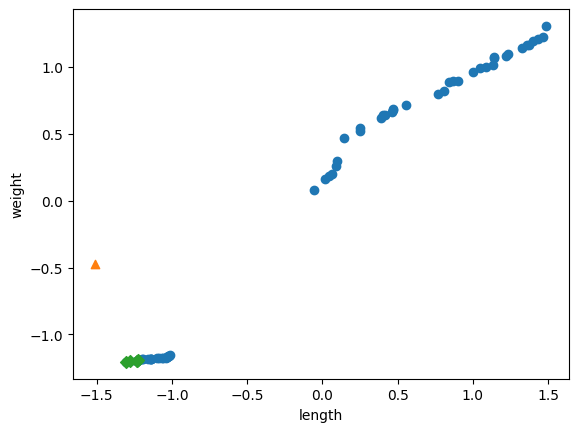

In [42]:
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(x_train_scaled[index,0], x_train_scaled[index,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
kn.predict([new])

array([1])

In [44]:
# 과대적합(overfit) , 과소적합(underfit) -- >과적합
from sklearn.neighbors import KNeighborsRegressor

In [45]:
# 가장 많은 데이터를 사용해서 과적합 확인해 보기

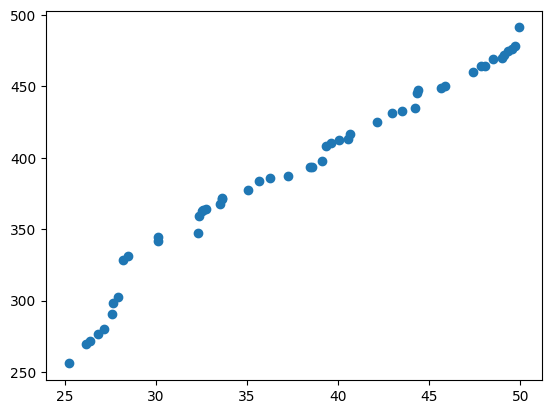

In [46]:
plt.scatter(pineApple_length, pineApple_weight)
plt.show()

In [47]:
# 데이터 분할   무게를 예측
# pineApple_length, pineApple_weight
x_train,x_test,y_train,y_test =  train_test_split(pineApple_length, pineApple_weight,random_state=42)

In [48]:
knr =  KNeighborsRegressor()

In [49]:
# 학습
x_train = np.array(x_train).reshape(-1, 1) 
x_test = np.array(x_test).reshape(-1, 1) 
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [50]:
# 평가
knr.score(x_test, y_test)

0.9847028690741264

In [51]:
knr.score(x_train, y_train)

0.9857902592406248

In [52]:
knr = KNeighborsRegressor()


In [53]:
x = np.arange(25,50).reshape(-1,1)

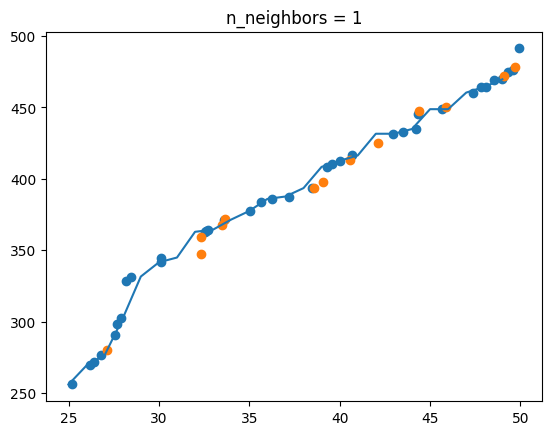

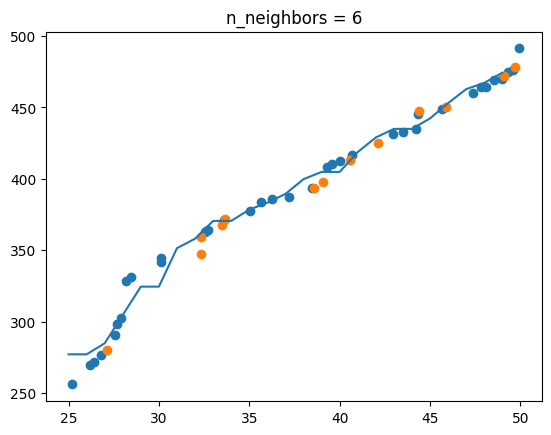

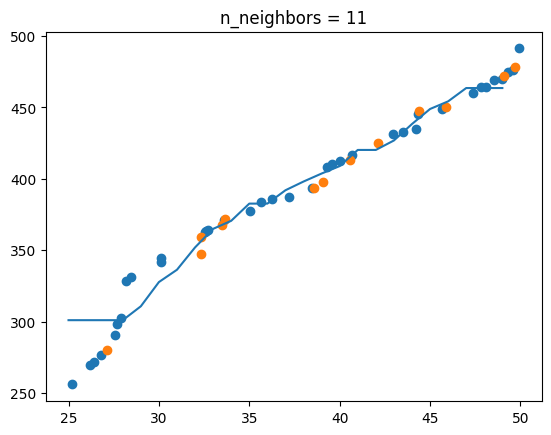

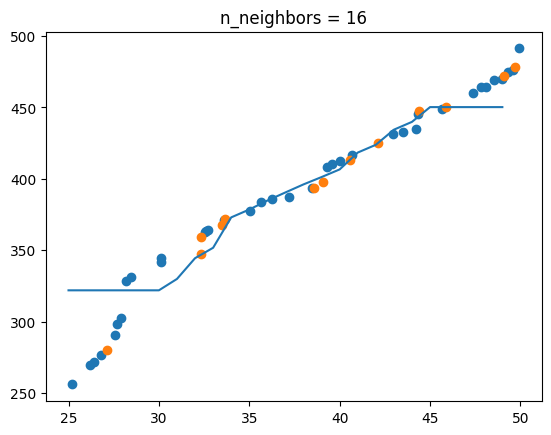

In [54]:
for i in range(1,20,5):
    knr.n_neighbors = i;
    knr.fit(x_train,y_train)
    plt.scatter(x_train,y_train)
    plt.scatter(x_test,y_test)
    predic = knr.predict(x)
    plt.plot(x, predic)
    plt.title(f"n_neighbors = {i}")
    plt.show()

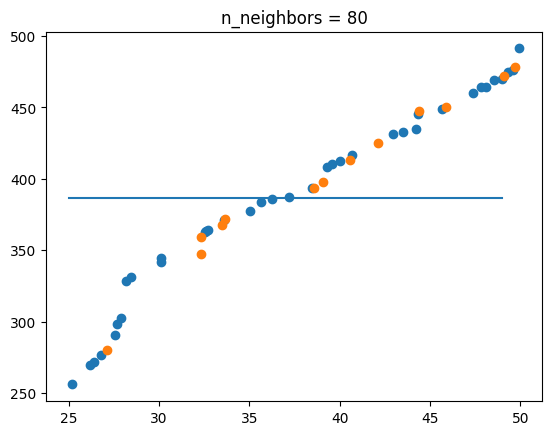

In [55]:
# 과소적합
knr.n_neighbors = 37;
knr.fit(x_train,y_train)
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
predic = knr.predict(x)
plt.plot(x, predic)
plt.title(f"n_neighbors = {80}")
plt.show()

In [56]:
# 회귀 알고리즘을 이용해서 길이가 55인 무개를 예측
x_train,x_test,y_train,y_test =  train_test_split(pineApple_length, pineApple_weight,random_state=42)

In [57]:
# 머신러닝 객체
knr = KNeighborsRegressor()

In [58]:
# 머신러닝 훈련  ; 사이킷런 은 2차원
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [59]:
distance,idx = knr.kneighbors([[55]])

In [60]:
#값을 예측
knr.predict([[55]])

array([[476.33543109]])

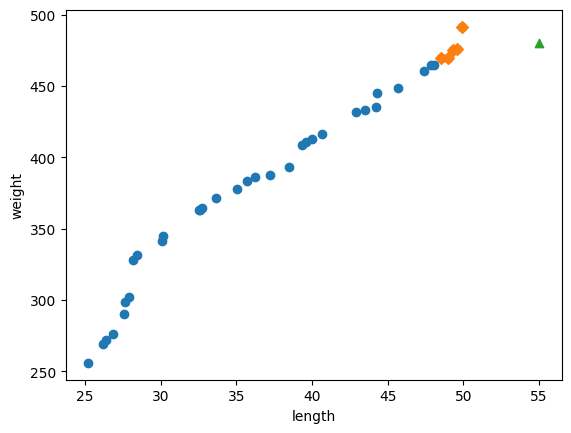

In [61]:
plt.scatter(x_train,y_train)
plt.scatter(x_train[idx],y_train[idx],marker='D')
plt.scatter(55,480,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [62]:
distance,idx = knr.kneighbors([[100]])
print(knr.predict([[100]]))

[[476.33543109]]


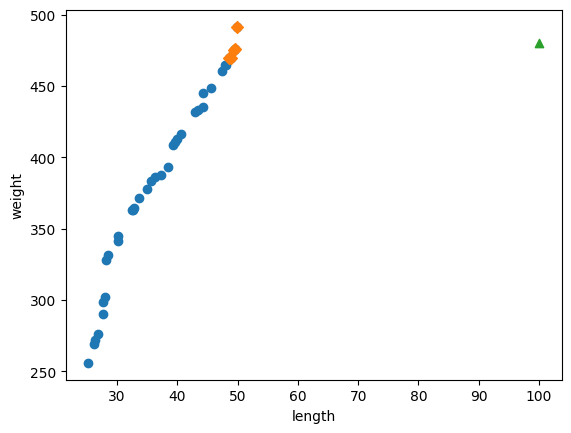

In [63]:
plt.scatter(x_train,y_train)
plt.scatter(x_train[idx],y_train[idx],marker='D')
plt.scatter(100,480,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [64]:
# 선형회귀 - 사잇킷런
from sklearn.linear_model import LinearRegression

In [65]:
x_test = np.array(x_test).reshape(-1,1)
# 객체
lr = LinearRegression()
# 훈련
lr.fit(x_train,y_train)
# 평가
lr.score(x_test,y_test)
# 예측  55, 100
print(lr.predict([[55]]))
print(lr.predict([[100]]))

[[528.6662182]]
[[894.04684095]]


In [66]:
# 산점도를 그려서 선형회귀가 어떻게 판단했고. 그 근거는 무엇인지 시각적으로 확인

In [67]:
# y = ax + b
# a : 기울기  
# b : 절편
print(f"기울기 : {lr.coef_}  절편은 : {lr.intercept_}")

기울기 : [[8.11956939]]  절편은 : [82.08990151]


In [68]:
# x가 25부터 55까지의 점들을 연결한 선을 그린다. --> 이때 y는 선형회귀의 수식을 이용해서 구한다.
lr.predict([[25]])[0], lr.predict([[55]])[0]

(array([285.07913637]), array([528.6662182]))

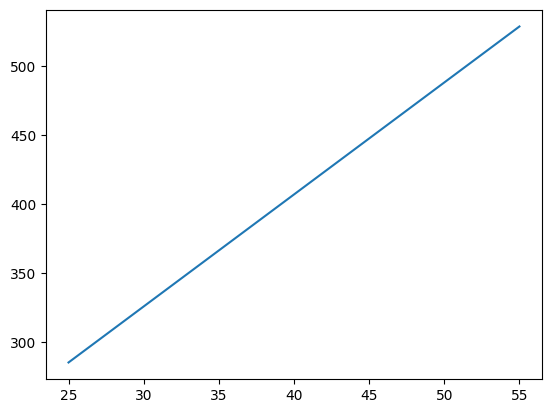

In [69]:
plt.plot([25,55],[lr.predict([[25]])[0], lr.predict([[55]])[0]])

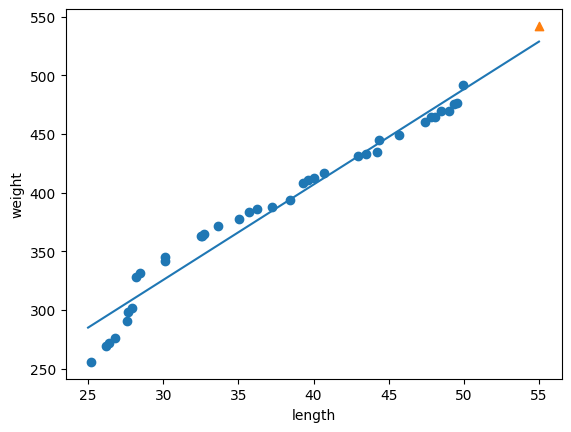

In [70]:
plt.scatter(x_train,y_train)
plt.scatter(55,542,marker='^')
plt.plot([25,55],[lr.predict([[25]])[0], lr.predict([[55]])[0]])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [71]:
lr.predict([[1]])

array([[90.2094709]])

In [72]:
pineApple_weight[:5] = list(map(lambda x : x-100, pineApple_weight[:5]))

In [73]:
# 데이터 분할
# pineApple_length, pineApple_weight
x_train,x_test,y_train,y_test =  train_test_split(pineApple_length,pineApple_weight,test_size=0.2,random_state=42)

In [74]:
x_train = np.array(x_train).reshape(-1,1)

In [75]:
lr =  LinearRegression()
lr.fit(x_train,y_train)
lr.predict([[55]])

array([554.50567179])

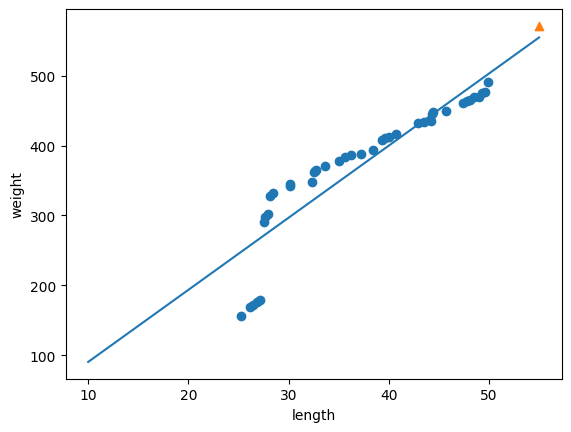

In [76]:
plt.scatter(x_train,y_train)
plt.scatter(55,571.00090932,marker='^')
plt.plot([10,55],[lr.predict([[10]])[0], lr.predict([[55]])[0]])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [78]:
lr.coef_, lr.intercept_

(array([10.30742783]), -12.402858916462435)

In [81]:
# y = ax +  b

In [82]:
# 다항회귀  -  특성이 여러개.
# y = ax**2 + bx + c

In [101]:
x_train.shape

(40, 1)

In [109]:
x_train_poly = np.column_stack((x_train**2,x_train))
x_train_poly.shape

(40, 2)

In [110]:
# 모델을 다시 훈련

In [111]:
lr.fit(x_train_poly,y_train)

LinearRegression()

In [112]:
lr.coef_, lr.intercept_

(array([-0.49384784, 47.55809714]), -682.4348867161843)

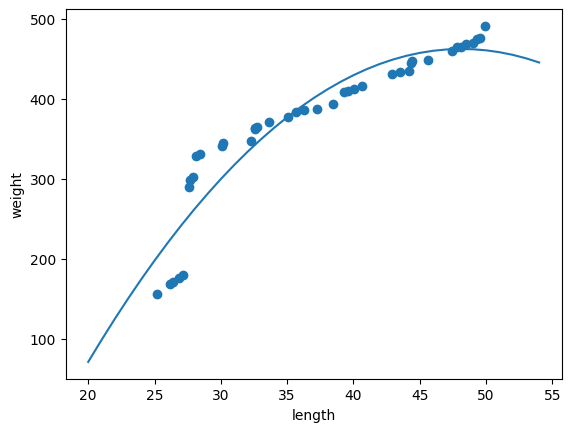

In [113]:
point = np.arange(20,55)
plt.scatter(x_train,y_train)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_ )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [114]:
x_train_poly_3d = np.column_stack((x_train**3,x_train**2,x_train))

In [115]:
x_train_poly_3d.shape

(40, 3)

In [116]:
lr.fit(x_train_poly_3d,y_train)

LinearRegression()

In [117]:
lr.coef_,lr.intercept_

(array([ 6.62239754e-02, -7.99358821e+00,  3.23768760e+02]),
 -3985.199269723457)

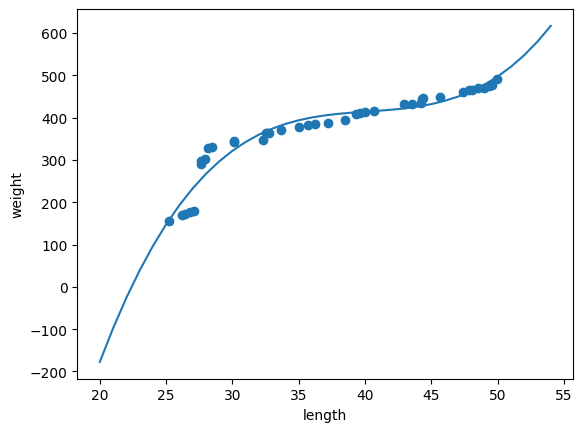

In [118]:
point = np.arange(20,55)
plt.scatter(x_train,y_train)
plt.plot(point, lr.coef_[0]*point**3 + lr.coef_[1]*point**2 + lr.coef_[2]*point + lr.intercept_ )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()